In [2]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder

In [3]:
csv_file = r'C:\DATASCIENCE\RonyProject\NullClass\Long Hair Identification/Hair_length_model/hair_length_.csv'
data = pd.read_csv(csv_file, names=['filename', 'label'])

In [4]:
image_folder = r'C:\DATASCIENCE\RonyProject\NullClass\Long Hair Identification\hairdata'

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values
    validation_split=0.2  # Split 20% for validation
)

In [6]:
train_generator = datagen.flow_from_directory(
    'C:/Ashrit/Dataset_1/hairdata_1',  # Path to dataset directory
    target_size=(128, 128),  # Resize images to 224x224
    batch_size=32,
    class_mode='categorical',  # Or 'binary' if binary classification
    subset='training'  # Specify training subset
)

Found 16697 images belonging to 2 classes.


In [7]:
val_generator = datagen.flow_from_directory(
    'C:/Ashrit/Dataset_1/hairdata_1',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Specify validation subset
)

Found 4173 images belonging to 2 classes.


In [8]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # Binary classification (long/short)
])

c:\Users\Rony\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

c:\Users\Rony\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
522/522 ━━━━━━━━━━━━━━━━━━━━ 482s 922ms/step - accuracy: 0.8126 - loss: 0.3980 - val_accuracy: 0.9010 - val_loss: 0.2441
Epoch 2/10
522/522 ━━━━━━━━━━━━━━━━━━━━ 335s 641ms/step - accuracy: 0.9355 - loss: 0.1670 - val_accuracy: 0.9276 - val_loss: 0.1854
Epoch 3/10
522/522 ━━━━━━━━━━━━━━━━━━━━ 274s 525ms/step - accuracy: 0.9479 - loss: 0.1300 - val_accuracy: 0.9104 - val_loss: 0.2156
Epoch 4/10
522/522 ━━━━━━━━━━━━━━━━━━━━ 276s 530ms/step - accuracy: 0.9522 - loss: 0.1186 - val_accuracy: 0.9209 - val_loss: 0.1897
Epoch 5/10
522/522 ━━━━━━━━━━━━━━━━━━━━ 332s 637ms/step - accuracy: 0.9612 - loss: 0.0972 - val_accuracy: 0.9231 - val_loss: 0.1879
Epoch 6/10
522/522 ━━━━━━━━━━━━━━━━━━━━ 392s 751ms/step - accuracy: 0.9697 - loss: 0.0774 - val_accuracy: 0.9327 - val_loss: 0.1878
Epoch 7/10
522/522 ━━━━━━━━━━━━━━━━━━━━ 268s 513ms/step - accuracy: 0.9685 - loss: 0.0772 - val_accuracy: 0.9272 - val_loss: 0.1960
Epoch 8/10
522/522 ━━━━━━━━━━━━━━━━━━━━ 303s 580ms/step - accuracy: 0.9777 -

In [19]:
model.save( r'C:\DATASCIENCE\RonyProject\NullClass\Long Hair Identification\hair_length_predict_model.keras')

print("Model training completed and saved as 'hair_length_predict_model.keras'.")

Model training completed and saved as 'hair_length_predict_model.keras'.


In [20]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [21]:
val_generator.reset()  # Reset generator before predictions
predictions = model.predict(val_generator)
predicted_classes = np.argmax(predictions, axis=1)  # Get class with highest probability
true_classes = val_generator.classes  # True labels
class_labels = list(val_generator.class_indices.keys())

131/131 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step


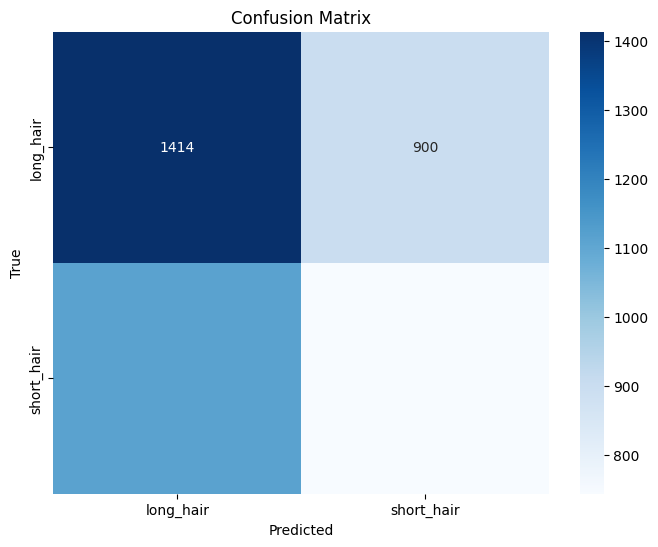

In [22]:
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [23]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

   long_hair       0.56      0.61      0.58      2314
  short_hair       0.45      0.40      0.42      1859

    accuracy                           0.52      4173
   macro avg       0.51      0.51      0.50      4173
weighted avg       0.51      0.52      0.51      4173



In [24]:
for layer in model.layers:
    print(f"Layer: {layer.name}")
    print("Weights:")
    print(layer.get_weights())  # This will output the weights and biases of the layer
    print()

Layer: conv2d
Weights:
[array([[[[ 1.68111503e-01,  2.73551159e-02,  2.80021317e-02,
           1.22873679e-01, -1.37008965e-01,  7.68247917e-02,
           2.54844781e-02, -1.57635853e-01, -1.87771559e-01,
           1.60569862e-01,  1.58324063e-01, -1.01937801e-01,
          -1.38341129e-01, -7.93118328e-02, -1.47007436e-01,
           4.35547903e-02, -1.41596526e-01, -3.12426388e-02,
          -7.89419785e-02, -1.53878480e-01, -1.18905410e-01,
          -8.88814591e-03, -7.60831162e-02,  5.14299534e-02,
          -1.52666643e-01,  1.66064680e-01,  1.44436359e-01,
          -7.05492347e-02, -1.81425452e-01,  1.91119745e-01,
           7.07001751e-03,  4.73600365e-02],
         [ 1.14129214e-02,  1.79383546e-01,  7.93633834e-02,
           5.81597053e-02, -5.56750037e-02,  9.52609777e-02,
           8.32433701e-02, -1.34542450e-01, -1.54810667e-01,
          -5.66609986e-02,  1.03807330e-01, -6.27021119e-02,
           1.19840791e-02, -8.95688236e-02, -6.12838604e-02,
          -1.501

In [25]:
model.save_weights(r'C:\DATASCIENCE\RonyProject\NullClass\Long Hair Identification\hair_length.weights.h5')
print("Model weights saved.")

Model weights saved.


In [26]:
trainable_params = np.sum([np.prod(v.shape) for v in model.trainable_weights])
non_trainable_params = np.sum([np.prod(v.shape) for v in model.non_trainable_weights])
total_params = trainable_params + non_trainable_params

print(f"Trainable Parameters: {trainable_params}")
print(f"Non-Trainable Parameters: {non_trainable_params}")
print(f"Total Parameters: {total_params}")

Trainable Parameters: 3304898
Non-Trainable Parameters: 0.0
Total Parameters: 3304898.0
